# Ice cream mining

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from sklearn.preprocessing import LabelEncoder,Imputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/responses.csv')

In [4]:
df.head()

,Timestamp,Email Address,Name,Neighbourhood,Rating,Brands,Flavor,Packaging,Source,Type,Frequency,Price,Quality,Occasion,New_flavors
0,2/6/2018 19:12:51,NaN,Neha Baranwal,Thane,10,"Mother Dairy, Amul","Chocolate, Butterscotch",Cone,"Supermarkets, Ice cream parlour/ restaurants",Unit,Once a week,7.0,10.0,5,5.0
1,2/6/2018 19:17:21,NaN,Arvind Narayanan,Chembur,8,"Dinshaw’s, Amul, Kwality Walls","Chocolate, Vanilla, Butterscotch, Pistachio",Cone,"Ice cream parlour/ restaurants, Minimart",Unit,Once a month,7.0,8.0,10,4.0
2,2/6/2018 21:01:58,2015bhavika.adnani@ves.ac.in,Bhavika,Thane,8,"Baskin-Robbins, Amul, Kwality Walls","Chocolate, Vanilla, Coffee",Cone,"Ice cream parlour/ restaurants, Ice cream cart...",Unit,Once a month,1.0,10.0,8,6.0
3,2/6/2018 21:02:15,2015mayank.agrawal@ves.ac.in,Mayank Agrawal,Chembur,9,"Baskin-Robbins, Amul, Creambell","Chocolate, Butterscotch",Cone,Ice cream parlour/ restaurants,Unit,Once a month,2.0,10.0,9,4.0
4,2/6/2018 21:09:39,2015bhuvanesh.goplani@ves.ac.in,Bhuvanesh Goplani,Chembur,4,"Baskin-Robbins, Home made","Vanilla, Strawberry, Butterscotch",Tub,Ice cream parlour/ restaurants,Unit,Once a month,3.0,10.0,6,5.0


## Preprocessing

### Removing redundant columns

In [5]:
df = df.drop(['Timestamp', 'Email Address', 'Name'], 1)

In [6]:
pd.DataFrame(df.Type).apply(pd.value_counts)

,Type
Unit,46
Bulk,11


In [7]:
df = df.drop(['Type'], 1)

### Dealing with null values

In [8]:
pd.DataFrame(df.isnull().sum(), columns=['null_values'])

,null_values
Neighbourhood,6
Rating,0
Brands,1
Flavor,0
Packaging,0
Source,1
Frequency,1
Price,1
Quality,2
Occasion,0


In [9]:
df = df[~df.Neighbourhood.isna()]

In [10]:
df.Neighbourhood = df.Neighbourhood.str.lower().str.strip()
df.Brands = df.Brands.str.lower().str.strip()
df.Flavor = df.Flavor.str.lower().str.strip()

In [11]:
df_neighCounts = pd.DataFrame(df.Neighbourhood).apply(pd.value_counts)

In [12]:
df_neighCounts

,Neighbourhood
chembur,15
thane,10
ulhasnagar,9
kalyan,3
ghatkopar,2
dombivli,2
nerul,1
govandi,1
lower parel,1
california,1


In [13]:
one_values = df_neighCounts[df_neighCounts.Neighbourhood == 1].reset_index()['index'].tolist()

In [14]:
df = df[~df.Neighbourhood.isin(one_values)]

In [15]:
pd.DataFrame(df.isnull().sum(), columns=['null_values'])

,null_values
Neighbourhood,0
Rating,0
Brands,1
Flavor,0
Packaging,0
Source,0
Frequency,1
Price,0
Quality,1
Occasion,0


In [16]:
df = df.join(df.Brands.str.get_dummies(sep=", "))
df = df.join(df.Flavor.str.get_dummies(sep=", "))
df = df.join(df.Frequency.str.get_dummies(sep=", "))
df = df.drop(['Brands', 'Flavor', 'Frequency'], axis=1)

In [17]:
def removeMissingVals(col):
    imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
    df[col]=imp.fit_transform(df[[col]])

In [18]:
removeMissingVals('Quality')

In [19]:
pd.DataFrame(df.isnull().sum(), columns=['null_values'])

,null_values
Neighbourhood,0
Rating,0
Packaging,0
Source,0
Price,0
Quality,0
Occasion,0
New_flavors,0
amul,0
any brand,0


In [20]:
def convStringToCat(df, column):
    nullCols = df[column].isnull()
    df[column].loc[nullCols] = 'NaN'
    df[column] = df[column].str.lower().str.strip()
    le = LabelEncoder()
    le.fit(df[column].values)
    df[column] = le.transform(df[column].values)
    df[column][nullCols] = np.nan
    return le

In [21]:
labelEncoders = {}
labelEncoders['Packaging'] = convStringToCat(df, 'Packaging')
labelEncoders['Neighbourhood'] = convStringToCat(df, 'Neighbourhood')

In [22]:
df = df.drop(['any brand'], axis=1)

## Visualization

In [23]:
brands = ['amul', 'baskin-robbins', 'creambell',
        'dinshaw’s', 'gelato italiano', 'havmor', 'home made', 'kwality walls',
       'local icecream shops', 'london dairy', 'mother dairy', 'naturals',
       'vadilal']
flavors = ['butterscotch', 'chocolate', 'coffee', 'mango', 'mint',
       'oreo', 'pistachio', 'strawberry', 'vanilla']
frequency = ['3-4 times a week',
       'Once a month', 'Once a week', 'twice a month']

In [24]:
neighCount = {}
for Neighbourhood in df['Neighbourhood'].unique():
    neighString = labelEncoders['Neighbourhood'].inverse_transform([int(Neighbourhood)])[0]
    neighCount[labelEncoders['Neighbourhood'].inverse_transform([int(Neighbourhood)])[0]] = [len(df[(df['Neighbourhood'] == Neighbourhood) & (df[brand] == 1)]) for brand in brands]

In [25]:
neighCount

{'chembur': [10, 12, 2, 6, 0, 3, 1, 7, 1, 2, 4, 1, 2],
 'dombivli': [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'ghatkopar': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'kalyan': [2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1],
 'thane': [10, 4, 1, 3, 1, 4, 0, 5, 0, 0, 3, 0, 2],
 'ulhasnagar': [7, 5, 2, 2, 0, 1, 0, 7, 0, 0, 4, 0, 2]}

In [26]:
df.groupby(['Neighbourhood'])['Rating'].mean()

Neighbourhood
0    8.200000
1    7.500000
2    6.000000
3    9.000000
4    9.500000
5    8.111111
Name: Rating, dtype: float64

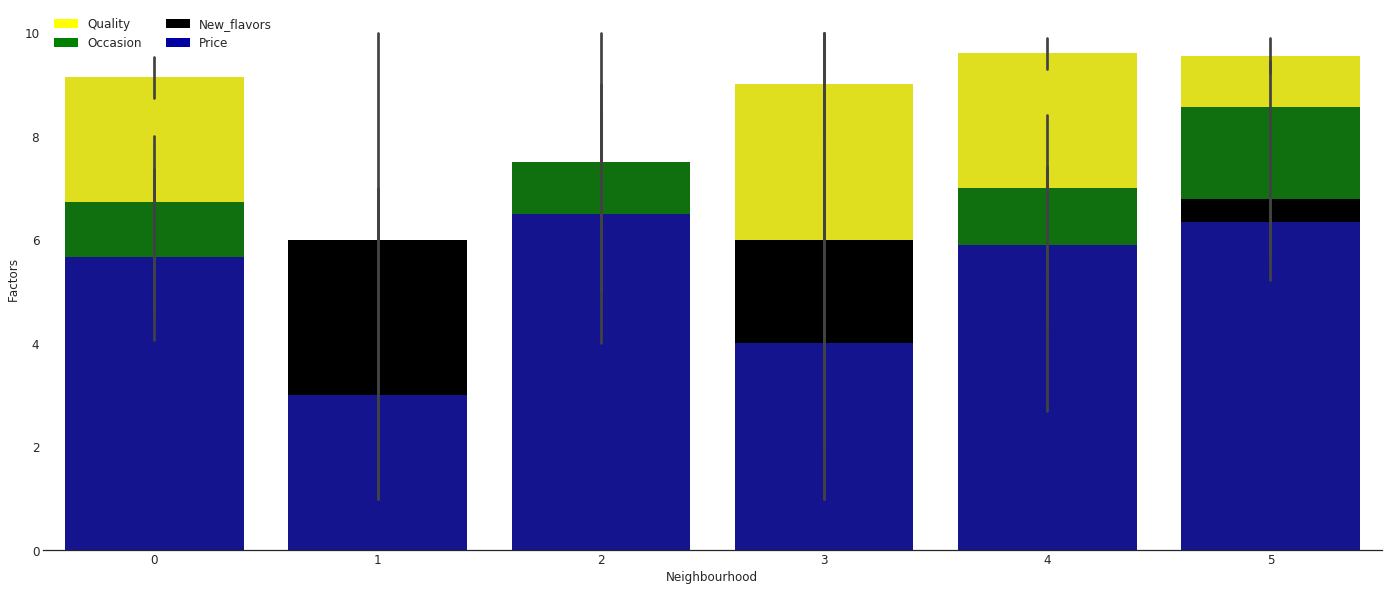

In [27]:
stacked_bar_data = df.copy()
stacked_bar_data["total"] = (stacked_bar_data.Price + stacked_bar_data.Quality + stacked_bar_data.Occasion + stacked_bar_data.New_flavors)/4
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
x = stacked_bar_data.Neighbourhood
y = stacked_bar_data.total
xTicks = list(labelEncoders['Neighbourhood'].inverse_transform([i for i in range(6)]))

res = sns.barplot(x = x, y = y, color = "red")
res.set(xticklabels=xTicks)
top_plot = sns.barplot(x = stacked_bar_data.Neighbourhood, y = stacked_bar_data.Quality, color = "yellow")
top_plot = sns.barplot(x = stacked_bar_data.Neighbourhood, y = stacked_bar_data.Occasion, color = "green")
top_plot = sns.barplot(x = stacked_bar_data.Neighbourhood, y = stacked_bar_data.New_flavors, color = "black")
bottom_plot = sns.barplot(x = stacked_bar_data.Neighbourhood, y = stacked_bar_data.Price, color = "#0000A3")
sns.despine(left=True)
bottom_plot.set_ylabel("Factors")
bottom_plot.set_xlabel("Neighbourhood")



#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(12)
    
Quality = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
Occasion = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
New_flavors = plt.Rectangle((0,0),1,1,fc='black',  edgecolor = 'none')
Price = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([Quality,Occasion,New_flavors,Price], ['Quality','Occasion','New_flavors','Price'], loc=2, ncol = 2, prop={'size':12})
l.draw_frame(False)

In [28]:
xTicks

['chembur', 'dombivli', 'ghatkopar', 'kalyan', 'thane', 'ulhasnagar']

In [29]:
df_temp = df.groupby(['Neighbourhood'])[brands].sum()
df_temp['Neigh_label'] = xTicks
df_temp

,amul,baskin-robbins,creambell,dinshaw’s,gelato italiano,havmor,home made,kwality walls,local icecream shops,london dairy,mother dairy,naturals,vadilal,Neigh_label
Neighbourhood,,,,,,,,,,,,,,
0,10,12,2,6,0,3,1,7,1,2,4,1,2,chembur
1,1,0,0,0,0,0,0,1,0,0,0,0,0,dombivli
2,1,0,0,0,0,0,0,0,0,0,0,0,0,ghatkopar
3,2,1,0,1,0,2,0,2,0,0,0,0,1,kalyan
4,10,4,1,3,1,4,0,5,0,0,3,0,2,thane
5,7,5,2,2,0,1,0,7,0,0,4,0,2,ulhasnagar


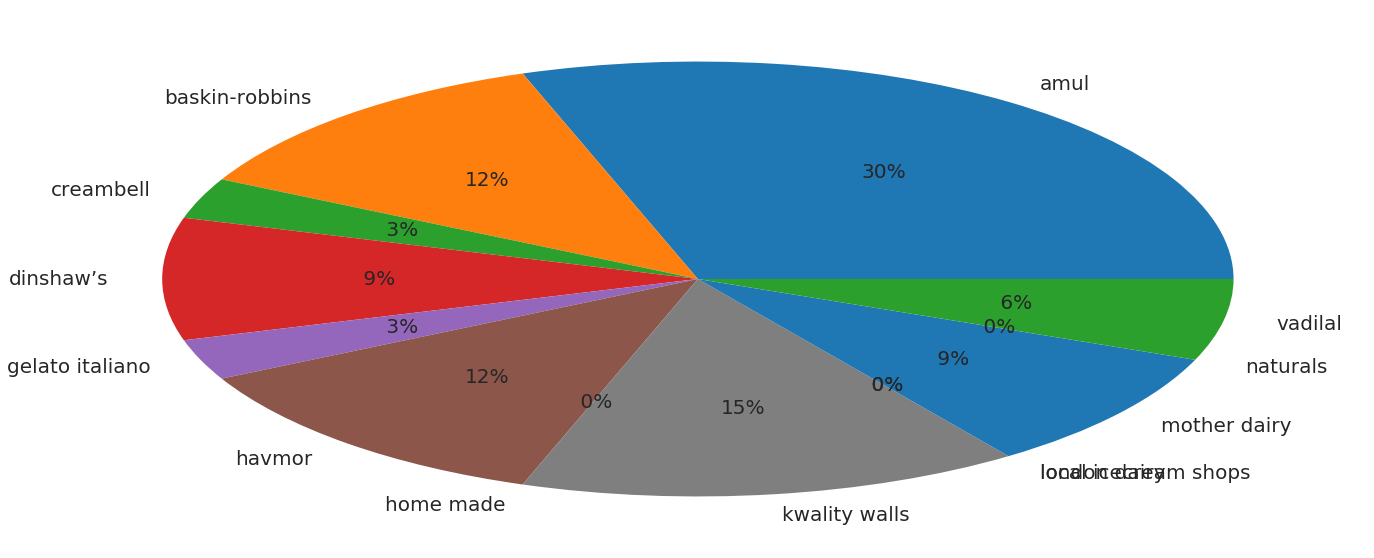

In [38]:
plt.pie(neighCount['thane'], labels = brands, autopct='%2.0f%%')
plt.rcParams['font.size'] = 20.0
plt.show()

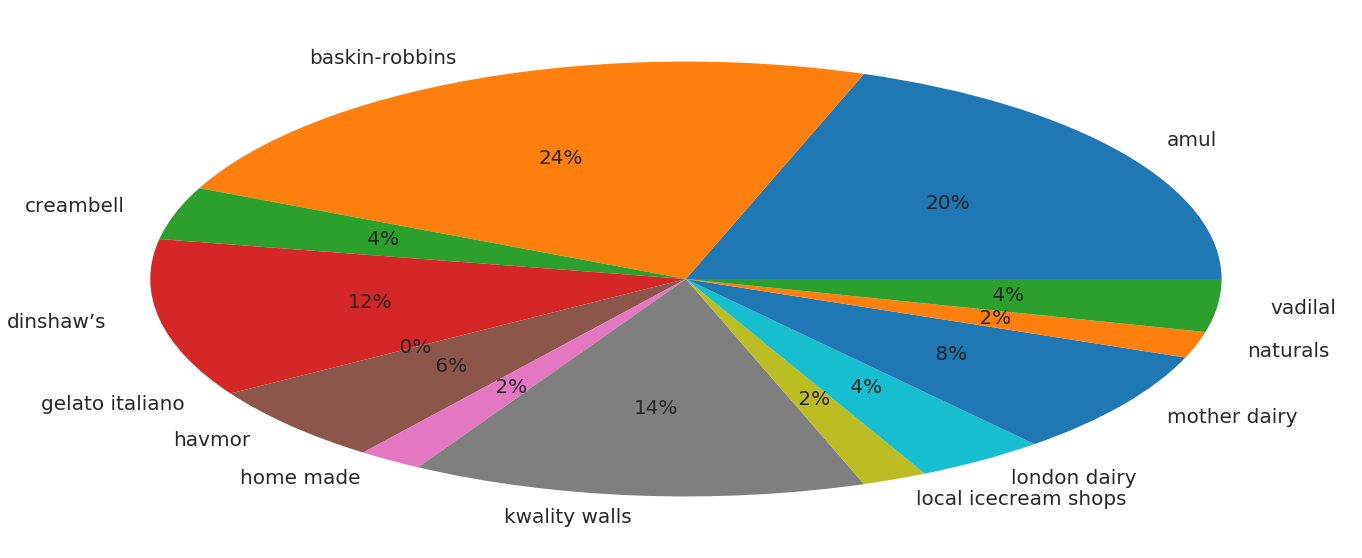

In [39]:
plt.pie(neighCount['chembur'], labels = brands, autopct='%2.0f%%')
plt.show()

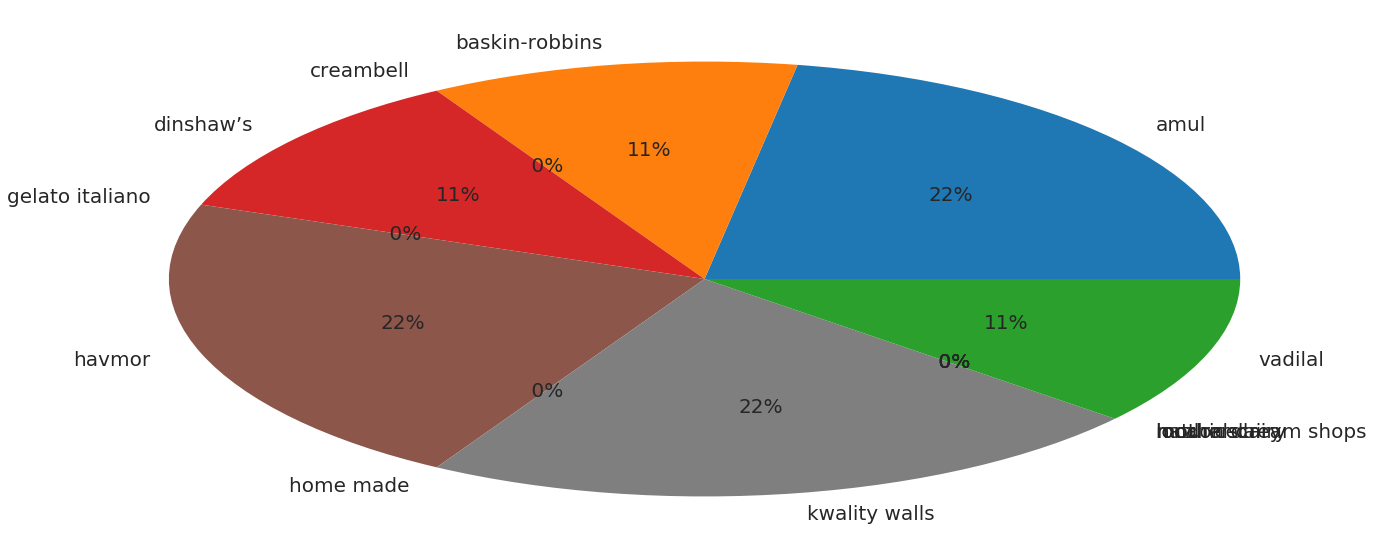

In [40]:
plt.pie(neighCount['kalyan'], labels = brands, autopct='%2.0f%%')
plt.show()

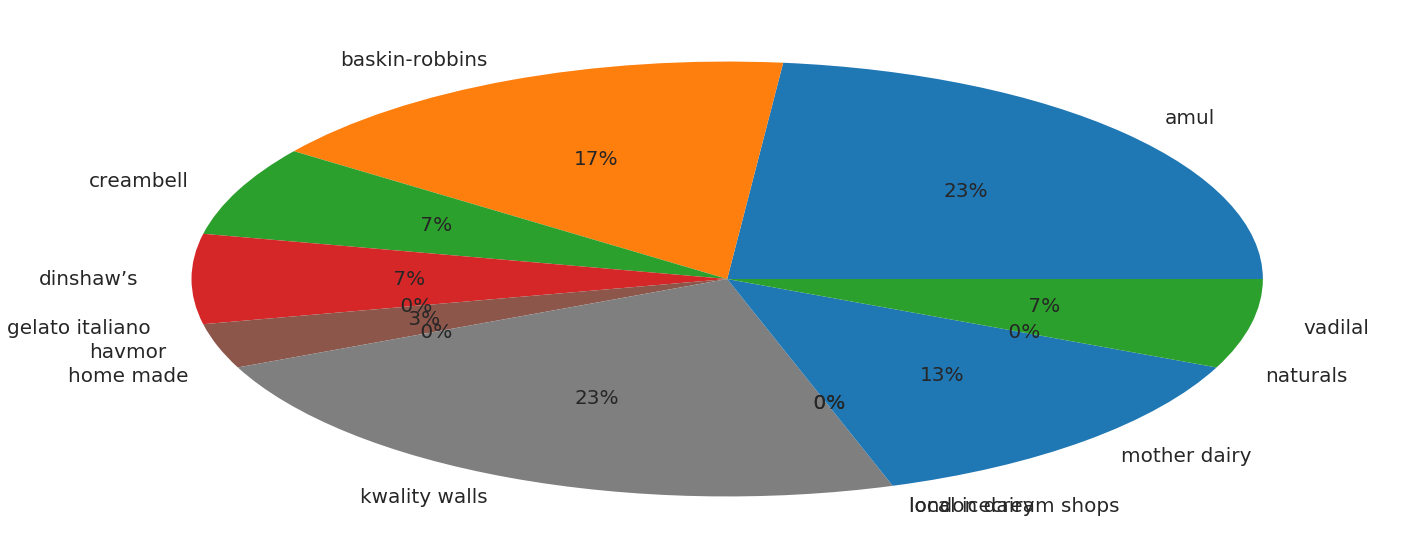

In [41]:
plt.pie(neighCount['ulhasnagar'], labels = brands, autopct='%2.0f%%')
plt.show()

In [43]:
flavors = ['butterscotch', 'chocolate', 'coffee', 'mango', 'mint',
       'oreo', 'pistachio', 'strawberry']

In [45]:
df_temp2 = df.groupby(['Neighbourhood'])[flavors].sum()
df_temp2['Neigh_label'] = xTicks
df_temp2

,butterscotch,chocolate,coffee,mango,mint,oreo,pistachio,strawberry,Neigh_label
Neighbourhood,,,,,,,,,
0,7,13,3,2,0,0,4,3,chembur
1,1,2,0,0,0,0,1,0,dombivli
2,1,1,0,0,0,0,0,0,ghatkopar
3,2,2,2,0,0,0,0,1,kalyan
4,7,9,3,2,1,1,3,4,thane
5,4,7,2,0,1,0,2,4,ulhasnagar


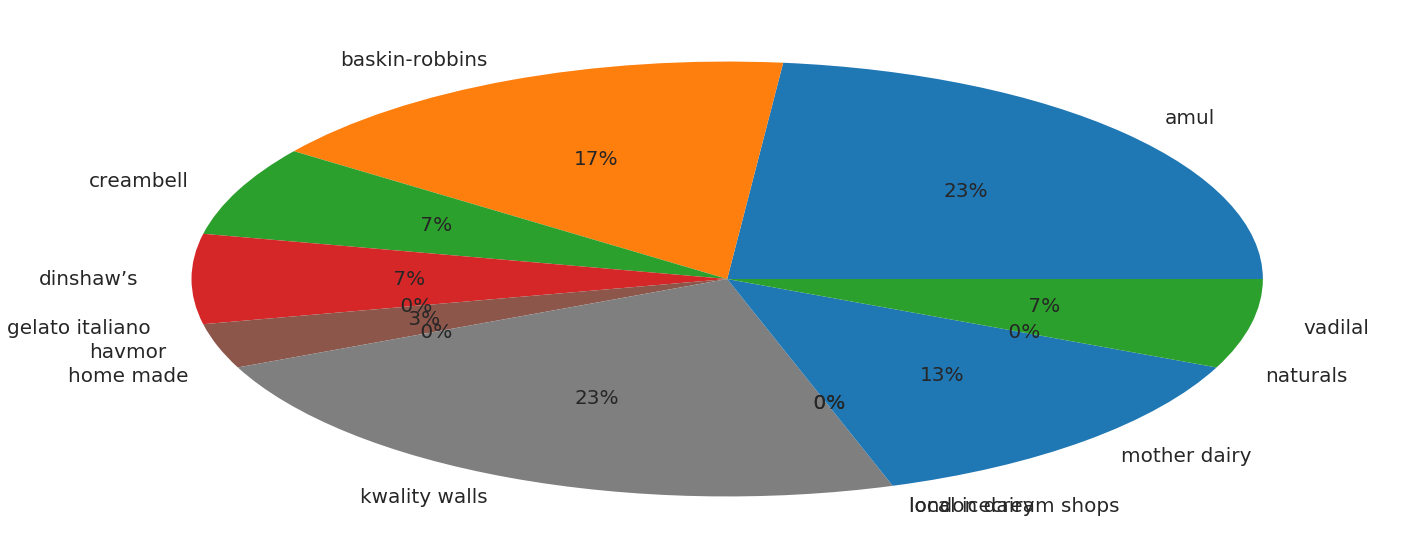

In [46]:
plt.pie(neighCount['ulhasnagar'], labels = brands, autopct='%2.0f%%')
plt.show()